In [1]:
import numpy as np
import random
import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pylab as plt

import glob
from glob import glob
import nibabel as nb
import pydicom as dicom
import matplotlib.patches as patches

import cv2

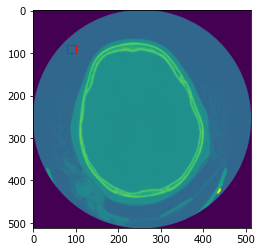

In [2]:
# specify your image path"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset\CQ500CT0 CQ500CT0\Unknown Study\CT 4cc sec 150cc D3D on\CT000000.dcm"
image_path = r"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset\CQ500CT0 CQ500CT0\Unknown Study\CT 4cc sec 150cc D3D on\CT000111.dcm"
ds = dicom.dcmread(image_path)

fig, ax = plt.subplots()
ax.imshow(ds.pixel_array)
ax.add_patch(patches.Rectangle((80,80),20,20,linewidth=1, edgecolor='r', facecolor='none'))


In [60]:
ds.pixel_array[0:80,0:80]
# plt.imshow(ds.pixel_array[130:150,170:200])
# plt.colorbar()

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ...,    27,    20,    20],
       [-2000, -2000, -2000, ...,    29,    23,    22],
       [-2000, -2000, -2000, ...,    28,    26,    25]], dtype=int16)

In [70]:
d = np.array(ds.pixel_array).flatten()
new_d = d.copy()
for i in range(len(d)):
    if(d[i]) < 800:
        new_d[i] = 0;
        

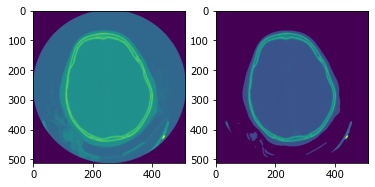

In [72]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(d.reshape(ds.pixel_array.shape))
plt.subplot(1,2,2)
plt.imshow(new_d.reshape(ds.pixel_array.shape))

# Building the dataset

256


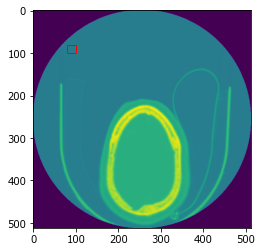

In [145]:
# specify your image path"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset\CQ500CT0 CQ500CT0\Unknown Study\CT 4cc sec 150cc D3D on\CT000000.dcm"
image_paths = glob(r"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset\CQ500CT108 CQ500CT108\Unknown Study\CT 0.625mm\*.dcm")
print(len(image_paths))
scans = []
for i in range(len(image_paths)):
    ds = dicom.dcmread(image_paths[i])
    scans.append(ds.pixel_array)

fig, ax = plt.subplots()
ax.imshow(scans[0])
ax.add_patch(patches.Rectangle((80,80),20,20,linewidth=1, edgecolor='r', facecolor='none'))


In [146]:
new_scans = scans.copy()
for i in range(len(new_scans)):
    new_scans[i] = np.array(new_scans[i]).flatten()

for f in range(len(new_scans)):
    for i in range(len(new_scans[f])):
        if(new_scans[f][i]) < 800:
            new_scans[f][i] = 0;

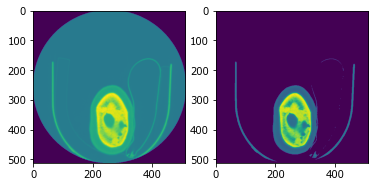

In [147]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(scans[10].reshape(ds.pixel_array.shape))
plt.subplot(1,2,2)
plt.imshow(new_scans[10].reshape(ds.pixel_array.shape))

In [148]:
for i in range(len(new_scans)):
    new_scans.append(np.fliplr(new_scans[i].reshape(512,512)))

IndexError: list index out of range

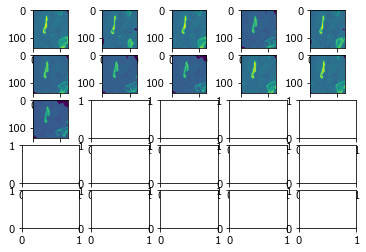

In [189]:
plt.subplots(5,5)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(new_scans[i+500].reshape(512,512)[120:258,130:258])

In [184]:
import imageio
for i in range(1,26):
    imageio.imwrite(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset\A\ct_img'+str(i+1560)+'.png', new_scans[i+375].reshape(512,512)[120:258,130:258])

Lossy conversion from int16 to uint8. Range [0, 2853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2810]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

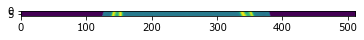

In [230]:
plt.imshow(plt.imread(r"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset\A\ct_img1.png"))